# Proyecto de Álgebra Lineal – Corte II
### Cálculo de Área de un Triángulo y Clasificación de Puntos con Python

In [2]:

import numpy as np
import math
import matplotlib.pyplot as plt


### Paso 1: Definición de función de transformación

In [3]:

def transformacion_coordenada(coord_geo, coord_ref):
    R = 6371000
    x = R * (coord_geo[1] - coord_ref[1]) * math.pi / 180 * math.cos(coord_ref[0] * math.pi / 180)
    y = R * (coord_geo[0] - coord_ref[0]) * math.pi / 180
    return x, y


### Paso 2: Coordenadas geográficas de tres lugares en Cartagena

In [4]:

area_google_maps = 28616.76

p0 = (10.424541187799125, -75.55394663821353)
p1 = (10.424410616572567, -75.5519665793451)
p2 = (10.423224281205982, -75.55154932556057)

v0 = transformacion_coordenada(p0, p0)
v1 = transformacion_coordenada(p1, p0)
v2 = transformacion_coordenada(p2, p0)

print(f"""
Coordenadas cartesianas:
v0: {v0}
v1: {v1}
v2: {v2}
""")



Coordenadas cartesianas:
v0: (0.0, 0.0)
v1: (216.53834650058724, -14.518857959008907)
v2: (262.16903254468895, -146.4333320222577)



### Paso 3: Cálculo del área del triángulo con determinante

In [5]:

M = np.array([
    [v0[0], v1[0], v2[0]],
    [v0[1], v1[1], v2[1]],
    [   1 ,    1 ,    1 ]
])
det_M = np.linalg.det(M)
area_determinante = 0.5 * np.abs(det_M)
print("Área por determinante:", area_determinante)

error_relativo = np.abs(area_google_maps - area_determinante) / area_google_maps * 100
print("Error relativo porcentual: {:.2f}%".format(error_relativo))


Área por determinante: 13951.018321952033
Error relativo porcentual: 51.25%


### Paso 4: Clasificación de puntos (interior, frontera, exterior)

In [6]:

p_interior = (10.4238, -75.5525)
p_frontera = (10.4240, -75.5528)
p_exterior = (10.4220, -75.5500)

v_interior = transformacion_coordenada(p_interior, p0)
v_frontera = transformacion_coordenada(p_frontera, p0)
v_exterior = transformacion_coordenada(p_exterior, p0)

def area_triangulo(p1, p2, p3):
    mat = np.array([
        [p1[0], p2[0], p3[0]],
        [p1[1], p2[1], p3[1]],
        [   1 ,    1 ,    1 ]
    ])
    return 0.5 * np.abs(np.linalg.det(mat))

def clasificar_punto(p, a, b, c):
    A = area_triangulo(a, b, c)
    A1 = area_triangulo(p, b, c)
    A2 = area_triangulo(a, p, c)
    A3 = area_triangulo(a, b, p)
    suma = A1 + A2 + A3

    if np.isclose(A1, 0) or np.isclose(A2, 0) or np.isclose(A3, 0):
        return "Frontera"
    elif np.isclose(suma, A):
        return "Interior"
    else:
        return "Exterior"

print("Punto interior:", clasificar_punto(v_interior, v0, v1, v2))
print("Punto frontera:", clasificar_punto(v_frontera, v0, v1, v2))
print("Punto exterior:", clasificar_punto(v_exterior, v0, v1, v2))


Punto interior: Interior
Punto frontera: Interior
Punto exterior: Exterior


### Visualización del triángulo y puntos

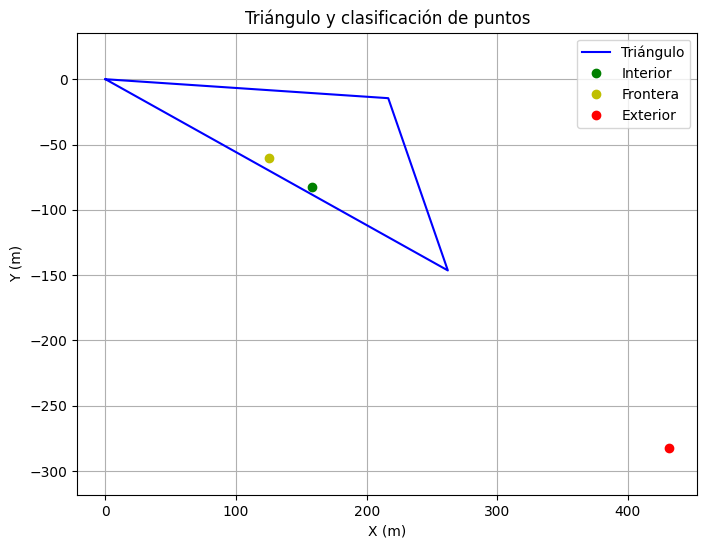

In [7]:

# Dibujar triángulo y puntos
x_coords = [v0[0], v1[0], v2[0], v0[0]]
y_coords = [v0[1], v1[1], v2[1], v0[1]]

plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, 'b-', label='Triángulo')
plt.plot(*v_interior, 'go', label='Interior')
plt.plot(*v_frontera, 'yo', label='Frontera')
plt.plot(*v_exterior, 'ro', label='Exterior')

plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Triángulo y clasificación de puntos")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
